In [1]:
import sys
from pathlib import Path
project_root = Path().resolve().parent  
sys.path.append(str(project_root))
from calculator_core import *
from calculator_core.ATP_DEC import *

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df2019 = pd.read_csv(project_root / "results" / "2019" / "PVG-LHR" / "results_CF_filtered_30D.csv")
df2023 = pd.read_csv(project_root / "results" / "2023" / "PVG-LHR" / "results_CF_filtered_30D.csv")

In [4]:
df2019['date'] = pd.to_datetime(df2019['date'])
df2023['date'] = pd.to_datetime(df2023['date'])

df2019.index = df2019['date']
df2023.index = df2023['date']

In [5]:
df2019 = df2019.groupby(df2019.index.date).first()
df2023 = df2023.groupby(df2023.index.date).first()

In [6]:
df2019 = df2019[(df2019['airline_code'].fillna("").str.startswith("BA"))]
df2023 = df2023[(df2023['airline_code'].fillna("").str.startswith("BA"))]

In [7]:
df2019['month'] = df2019['date'].dt.strftime('%b')
df2023['month'] = df2023['date'].dt.strftime('%b')

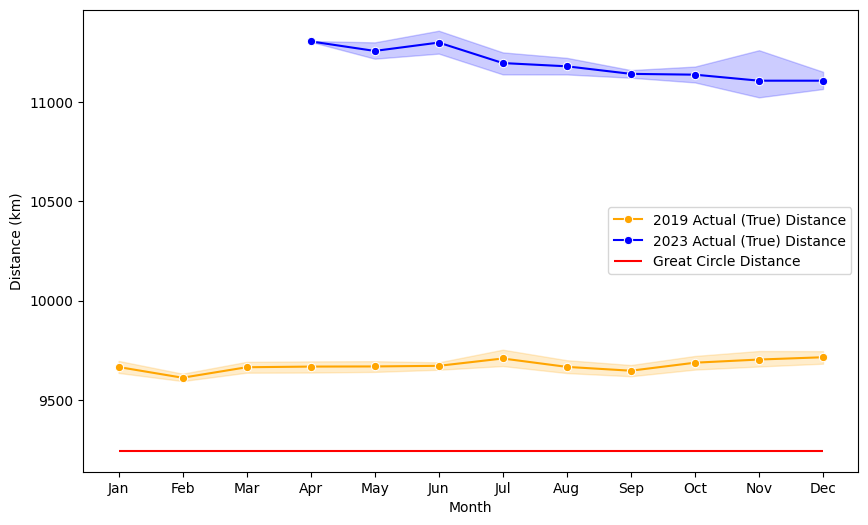

In [8]:
# distance comparison

custom_palette = {
    f'2019 - actual_distance': 'orange',
    f'2023 - actual_distance': 'blue',
}

df2019['source'] = '2019'
df2023['source'] = '2023'

combined_df = pd.concat([df2019, df2023], ignore_index=True)

melted_df = combined_df.melt(
    id_vars=['month', 'source'], 
    value_vars=[f'actual_distance'], 
    var_name='Metric', 
    value_name='Carbon Footprint (kg CO2e)'
)

melted_df['Footprint Method'] = melted_df['source'] + ' - ' + melted_df['Metric']

plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='month', y='Carbon Footprint (kg CO2e)', hue='Footprint Method', 
             palette=custom_palette, 
             marker='o')

plt.xlabel('Month')
plt.ylabel('Distance (km)')
#plt.title('Comparison of Distance of LHR-PVG in 2019 and 2023', weight='bold')
plt.hlines(9244.034182063437, 0, 11, colors=['red'], label=['GCD'])
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['2019 Actual (True) Distance', '2023 Actual (True) Distance', 'Great Circle Distance'],
    loc = 'center right'
)

plt.show()

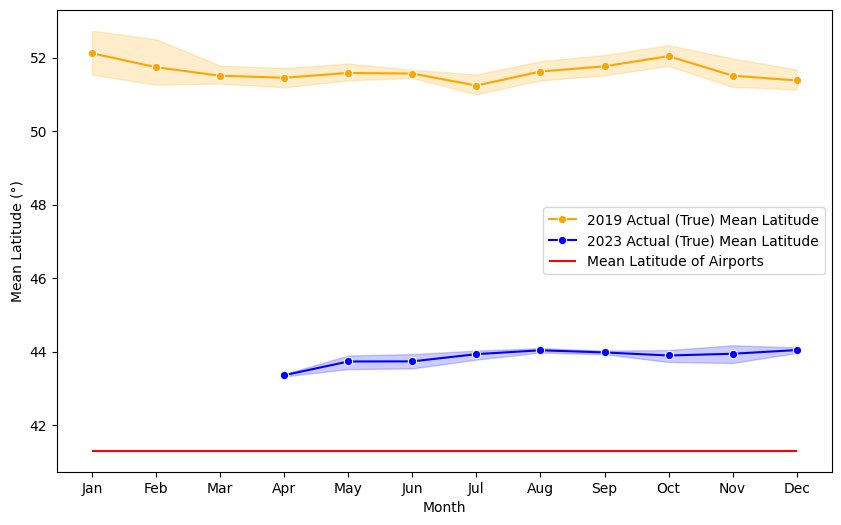

In [9]:
# Mean latitude comparison

custom_palette = {
    f'2019 - actual_latitude': 'orange',
    f'2023 - actual_latitude': 'blue',
}

melted_df = combined_df.melt(
    id_vars=['month', 'source'], 
    value_vars=[f'actual_latitude'], 
    var_name='Metric', 
    value_name='Carbon Footprint (kg CO2e)'
)

melted_df['Footprint Method'] = melted_df['source'] + ' - ' + melted_df['Metric']

plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='month', y='Carbon Footprint (kg CO2e)', hue='Footprint Method', 
             palette=custom_palette, 
             marker='o')

plt.xlabel('Month')
plt.ylabel(f'Mean Latitude (°)')
#plt.title('Comparison of Average Latitude of LHR-PVG in 2019 and 2023', weight='bold')
plt.hlines(41.307, 0, 11, colors=['red'], label=['GCD'])
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['2019 Actual (True) Mean Latitude', '2023 Actual (True) Mean Latitude', 'Mean Latitude of Airports'],
    loc='center right',
)
plt.show()

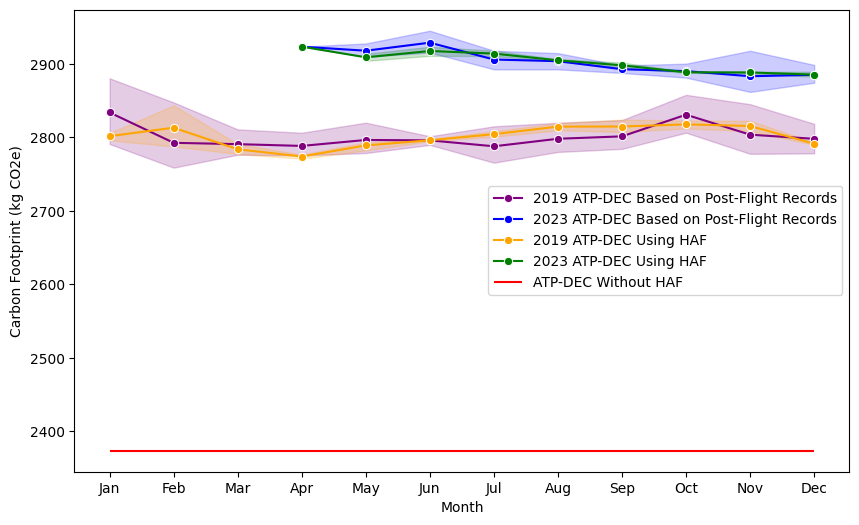

In [10]:
# ATP-DEC comparison

p_class = 'economy'

custom_palette = {
    f'2019 - actual_footprint_{p_class}_30D': 'purple',
    f'2019 - post_footprint_{p_class}_30D': 'orange',
    f'2023 - actual_footprint_{p_class}_30D': 'blue',
    f'2023 - post_footprint_{p_class}_30D': 'green'
}

melted_df = combined_df.melt(
    id_vars=['month', 'source'], 
    value_vars=[f'actual_footprint_{p_class}_30D', f'post_footprint_{p_class}_30D'], 
    var_name='Metric', 
    value_name='Carbon Footprint (kg CO2e)'
)

melted_df['Footprint Method'] = melted_df['source'] + ' - ' + melted_df['Metric']

plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x='month', y='Carbon Footprint (kg CO2e)', hue='Footprint Method', palette=custom_palette, marker='o')

plt.xlabel('Month')
plt.ylabel('Carbon Footprint (kg CO2e)')
#plt.title('Carbon Footprint of BA Economy Passenger on LHR-PVG', weight='bold')
plt.hlines(2373.477937379382, 0, 11, colors=['red'], label=['GCD'])
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(
    handles=handles,
    labels=['2019 ATP-DEC Based on Post-Flight Records', '2023 ATP-DEC Based on Post-Flight Records', '2019 ATP-DEC Using HAF', '2023 ATP-DEC Using HAF', 'ATP-DEC Without HAF'],
    loc='center right'
)
plt.show()